In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sqlite3

In [2]:
co2 = pd.read_csv('CO2_Emissions_1960-2018.csv')
# co2.head()
usa_co2 = co2[co2["Country Name"] == "United States"].transpose()
usa_co2 = usa_co2[1:].astype('float64')
usa_co2 = usa_co2.rename(columns={251: 'AVG CO2 EMISSIONS'})
usa_co2.index = usa_co2.index.astype('int64')
usa_co2.head()

,AVG CO2 EMISSIONS
1960,15.999779
1961,15.681256
1962,16.013937
1963,16.482762
1964,16.968119


In [3]:
# atlantic = pd.read_csv('atlantic.csv')
# pacific = pd.read_csv('pacific.csv')
# frames = [atlantic, pacific]
# hurricanes = pd.concat(frames)

# by_year_df = hurricanes.groupby("ID")["Date"].max().to_frame()
# by_year_df = by_year_df.astype({"Date" : "string"})
# by_year_df.Date = by_year_df.Date.str[:4]
# print(by_year_df.head())
# print(by_year_df.tail())

# atlantic_wind = atlantic.groupby("ID")["Maximum Wind"].max()
# pacific_wind = pacific.groupby("ID")["Maximum Wind"].max()

In [4]:
con = sqlite3.connect("FPA_FOD_20170508.sqlite")
# c = con.cursor()
# c.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(c.fetchall())
fires_df = pd.read_sql_query("SELECT * from Fires", con)

In [5]:
print(list(fires_df.columns))
fires_df.head()

['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape']


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [6]:
fire_count_df = fires_df.groupby("FIRE_YEAR")["OBJECTID"].count().to_frame().astype('float64')
fire_size_df = fires_df.groupby("FIRE_YEAR")["FIRE_SIZE"].mean().to_frame().astype('float64')
# print(fire_size_df)
# usa_co2.loc[1992:2015]

In [7]:
to_analyze = pd.concat([fire_count_df[:2015], usa_co2.loc[1992:2015], fire_size_df], axis=1)
to_analyze.rename(columns={'OBJECTID': 'FIRE COUNT'}, inplace=True)
to_analyze["FIRE COUNT"] /= 1000
# fire count represented in thousands
# co2 is metric tons per capita
# fire size is avg size of all fires in that year
to_analyze

,FIRE COUNT,AVG CO2 EMISSIONS,FIRE_SIZE
1992,67.975,19.025082,32.364222
1993,61.989,19.238109,35.356208
1994,75.955,19.280611,54.198875
1995,71.472,19.253938,28.676755
1996,75.574,19.611090,79.460604
1997,61.450,20.347873,52.313024
1998,68.370,20.266880,29.414983
1999,89.363,20.105720,68.039342
2000,96.416,20.471933,79.234760
2001,86.587,20.175005,43.009601


<AxesSubplot:ylabel='AVG CO2 EMISSIONS'>

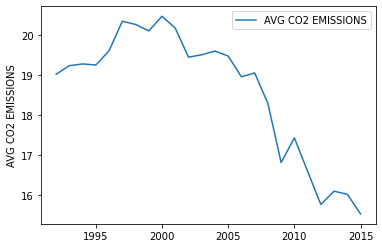

In [8]:
sns.lineplot(data=to_analyze,x=to_analyze.index,y="AVG CO2 EMISSIONS",label="AVG CO2 EMISSIONS")

<AxesSubplot:ylabel='FIRE COUNT'>

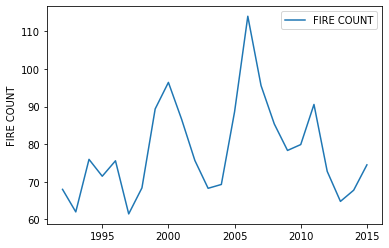

In [9]:
sns.lineplot(data=to_analyze,x=to_analyze.index,y="FIRE COUNT",label="FIRE COUNT")

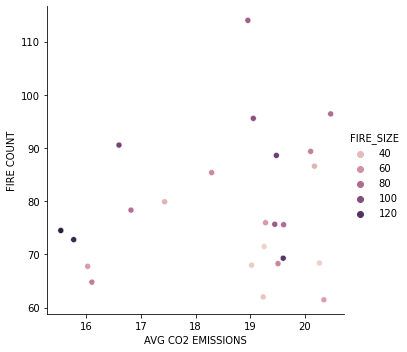

In [10]:
sns.relplot(x="AVG CO2 EMISSIONS",y="FIRE COUNT",data=to_analyze,hue='FIRE_SIZE')

In [11]:
# print(to_analyze['AVG CO2 EMISSIONS'].corr(to_analyze['FIRE COUNT']))

cor_count, p_count = stats.pearsonr(to_analyze['AVG CO2 EMISSIONS'], to_analyze['FIRE COUNT'])
cor_size, p_size = stats.pearsonr(to_analyze['AVG CO2 EMISSIONS'], to_analyze['FIRE_SIZE'])

print(f'Correlation between emissions and fire count: {cor_count}, p = {p_count}')
print(f'Correlation between emissions and fire size: {cor_size}, p = {p_size}')

Correlation between emissions and fire count: 0.13374465731313984, p = 0.5332556656809394
Correlation between emissions and fire size: -0.3971184924759201, p = 0.05467041098069222


In [22]:
east = ["ME","NH","VT","MA","RI","CT","NJ","DE","MD","NY","PA","VA","WV","NC","SC","GA","FL","OH","KY","TN","AL","MS","WI","IL","IN","MI"]
west = ["WA","OR","CA","NV","ID","UT","AZ","MT","AK","HI","WY","CO","NM","TX","ND","SD","NE","KS","OK","LA","AR","MO","IA","MN"]

by_state = fires_df.groupby("STATE")["OBJECTID"].count().to_frame()
east_fires = fires_df[fires_df["STATE"].isin(east)]
west_fires = fires_df[fires_df["STATE"].isin(west)]
print(east_fires.shape[0])
print(west_fires.shape[0])

893294
965024


893294
